In [2]:
import matplotlib.pyplot as plt
import scipy.special as scp
import scipy.stats as sts
import numpy as np
import sklearn.metrics as met
import math
import time
from tqdm import tqdm_notebook as tqdm

# Normal approximation and coin tosses

Verify the fact that $\mathcal B(n,p)$ can be decently approximated by $\mathcal N(np,np(1-p))$, for increasing values of $n$, but fixing $p=0.5$, that is a fair coin toss.

One can see that the normal approximation improves in following the tails. Refer to wikipedia about the interval of validity of the approximation.

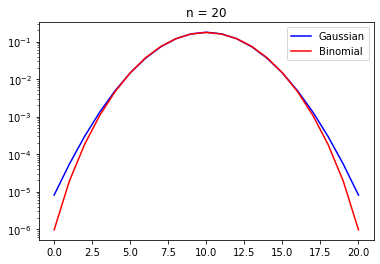

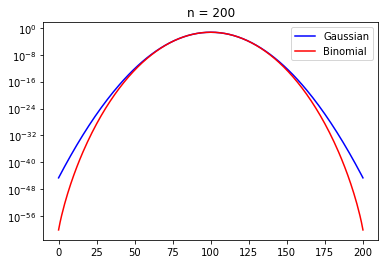

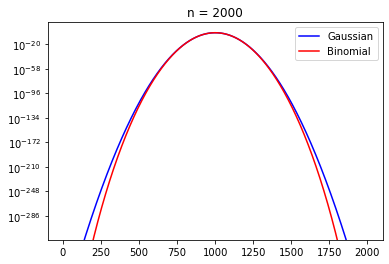

In [68]:
for n_toss in [20,200,2000]:
    plt.yscale('log')
    heads = np.arange(0,n_toss+1)
    plt.plot(heads,sts.norm.pdf(heads, loc = 0.5*n_toss, scale = math.sqrt(0.25*n_toss)),label='Gaussian',color = 'blue')
    plt.plot(heads,sts.binom.pmf(heads,n_toss,0.5,0),label='Binomial', color = 'red')
    plt.title('n = {}'.format(n_toss))
    plt.legend()
    plt.show()

Set up a very simple Monte Carlo simulation: simulate 10000 games where a coin is tossed 300 times. Check if the number of heads is distributed somewhere close to a normal distribution and a binomial.

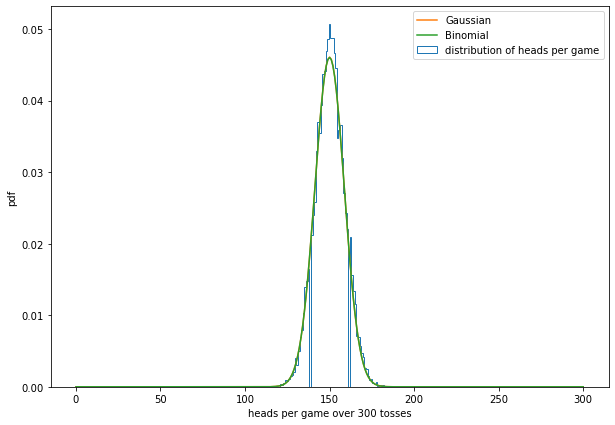

In [72]:
p        = 0.5
n_toss   = 300
attempts = 10000
heads    = np.arange(0,n_toss+1)
games    = []

plt.figure(figsize=(10,7))
for i in tqdm(range(0,int(attempts))):
    games.append(np.random.binomial(size=n_toss, n = 1, p = p).sum())

plt.hist(games,density = True,bins = 71,histtype='step',label='distribution of heads per game')
plt.plot(heads,sts.norm.pdf(heads, loc = p*n_toss, scale = math.sqrt((p-p*p)*n_toss)),label='Gaussian')
plt.plot(heads,sts.binom.pmf(heads,n_toss,p,0),label='Binomial')
plt.xlabel('heads per game over {} tosses'.format(n_toss))
plt.ylabel('pdf')
plt.legend()
plt.show()

Compute the MSE between a binomial and a normal distribution for progressively large numbers of tosses. The error scales like the number of tosses to the -3.5.

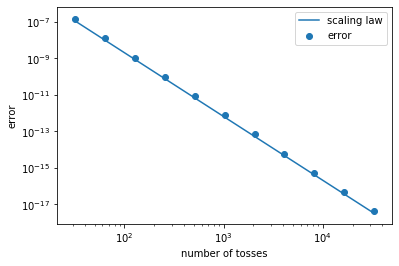

In [78]:
error = []
for i in tqdm(range(5,16)):
    n_toss = 2**i
    heads = np.arange(0,n_toss+1)
    error.append(met.mean_squared_error(sts.norm.pdf(heads, loc = 0.5*n_toss, scale = math.sqrt(0.25*n_toss)),
                             sts.binom.pmf(heads, n_toss, 0.5)))

plt.yscale('log')
plt.xscale('log')
plt.plot([2**i for i in range(5,16)],0.02*np.array([2**i for i in range(5,16)])**(-3.5),label='scaling law')
plt.scatter([2**i for i in range(5,16)],error,label='error', marker = 'o')
plt.legend()
plt.xlabel('number of tosses')
plt.ylabel('error')
plt.show()